# mean shift clustering

- to find the dense area/ cluster in data set.
  - dense....
- non - parametric.

- you do not have to decide the number of clusters beforehand
  - the model consider the distribution of data and decide the number of clusters dynamically.
 
- use kerneld density estimation to decide the cluster centers.

- Each point is moved towards the region of highest density.

-  use bandwidht to decide the influence of neighborhood.

-   iteratively shift the point until convergence. 
 
## model

## assumption

## objective/ loss function.

## hyper parameter

- distance
- 


## metrics. 

## algorithm

-  choose kernel function
 - based on the distribution of data.
- choose the bandwidth.
- for each data point
  - compute the mean of each points inside the window
  - move the points towards the mean
  - repeat until the convergence.
- merge nearby points to form final clusters.


## advantages 

- no need to decide the number of clusters beforehand.
  - k-means -  the number of clusters are one the hyper parameters. 
- can detect the arbitrary shape of clusters.
  - k-means - spherical
- works well with density based distribution.

## disadvantage

- computationally expensive for large data.
- bandwidth is added to hyper parameter and the influence of bandwidth is so high.

## used in

- image segmentation
- customer segmentation
- anomaly detection
- tracking movie object in movie. 

In [2]:
# prompt: bandwidth_estimate  function from meanshift clustering sklearn
#%load_ext rpy2.ipython
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
link = "https://raw.githubusercontent.com/oonyambu/ECON430/refs/heads/main/mean_shift.txt"
data = pd.read_table(link,  header=0, sep=" ")
data.head()

,V1,V2
0,3.466807,6.346185
1,7.946886,-4.697682
2,4.959691,5.107615
3,4.179008,2.606849
4,-1.586670,6.705622


In [4]:
h1 = estimate_bandwidth(data, quantile=0.1)
print(h1)
print(estimate_bandwidth(data, quantile=0.5))
print(estimate_bandwidth(data, quantile=0.9))

1.213028854403156
8.023541511979557
15.091670514803049


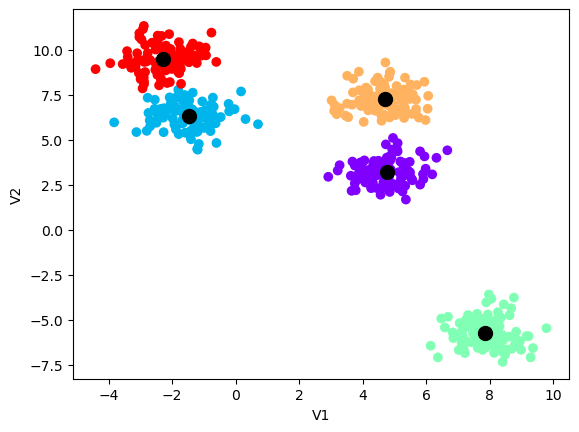

In [6]:
res = MeanShift(bandwidth=h1).fit(data) # uses a flat/linear kernel
labels = res.labels_
centers = data.groupby(labels).mean()
plt.scatter(data['V1'], data['V2'], cmap='rainbow', c=res.labels_)
plt.scatter(centers['V1'], centers['V2'], color='black', s = 100)
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()